## DS - 3001 Final Project: A Look into Healthcare System Capacity
#### Amanda Lin, Courtney Nguyen, Cole Blanton, Emaan Qillawala

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix

### 1. Question and background information on the data and why you are asking this question(s).  References to previous research/evidence generally would be nice to include.

### **Question Problem:** The CDC must determine the national healthcare system’s capacity to handle the COVID-19 pandemic and its severity. They would like to determine whether or not a county’s healthcare system capacity (the number of occupied beds) is at high occupancy (seen at 0.7 or more) based on county population, state, number of staffed beds per 1000 people, licensed all beds, etc.


In [280]:
covid = pd.read_csv("/Users/courtneynguyen2/Documents/myDS-3001/covid.csv")
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2537 non-null   int64  
 1   State                                       2537 non-null   object 
 2   County Name                                 2537 non-null   object 
 3   Staffed All Beds                            2537 non-null   float64
 4   Staffed ICU Beds                            2537 non-null   float64
 5   Licensed All Beds                           2537 non-null   float64
 6   All Bed Occupancy Rate                      2460 non-null   float64
 7   ICU Bed Occupancy Rate                      1410 non-null   float64
 8   Population                                  2537 non-null   float64
 9   Population (20+)                            2537 non-null   float64
 10  Population (

### **Clean Data** 

#### Drop Variables and NAs

In [281]:
covid = covid.drop(columns=['Staffed ICU Beds', 'ICU Bed Occupancy Rate', 'Staffed ICU Beds [Per 1000 People]', 'Staffed ICU Beds [Per 1000 Adults (20+)]', 'Staffed ICU Beds [Per 1000 Elderly (65+)]','ICU Bed Source', 'ICU Bed Source Last Updated'])
covid = covid.dropna()

### 2. Exploratory Data Analysis – Initial summary statistics and graphs with an emphasis on variables you believe to be important for your analysis.

### **Target Variable:** All Bed Occupancy Rate

In [282]:
covid.head()

,fips_code,State,County Name,Staffed All Beds,Licensed All Beds,All Bed Occupancy Rate,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
1,2020,AK,Anchorage,979.0,1149.0,0.66,291538.0,213508.0,32333.0,3.358,4.585,30.279,3.941,5.382,35.536
2,2050,AK,Bethel,34.0,37.0,0.40,18216.0,11082.0,1402.0,1.866,3.068,24.251,2.031,3.339,26.391
3,2070,AK,Dillingham,18.0,18.0,0.15,5000.0,3278.0,470.0,3.600,5.491,38.298,3.600,5.491,38.298
4,2090,AK,Fairbanks North Star,145.0,175.0,0.46,98971.0,72505.0,10204.0,1.465,2.000,14.210,1.768,2.414,17.150
5,2110,AK,Juneau,45.0,73.0,0.41,32113.0,24525.0,4298.0,1.401,1.835,10.470,2.273,2.977,16.985


### Checking Composition of Data

In [283]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 1 to 2536
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   fips_code                                   2436 non-null   int64  
 1   State                                       2436 non-null   object 
 2   County Name                                 2436 non-null   object 
 3   Staffed All Beds                            2436 non-null   float64
 4   Licensed All Beds                           2436 non-null   float64
 5   All Bed Occupancy Rate                      2436 non-null   float64
 6   Population                                  2436 non-null   float64
 7   Population (20+)                            2436 non-null   float64
 8   Population (65+)                            2436 non-null   float64
 9   Staffed All Beds [Per 1000 People]          2436 non-null   float64
 10  Staffed All Beds 

#### Value Counts of Counties per State 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


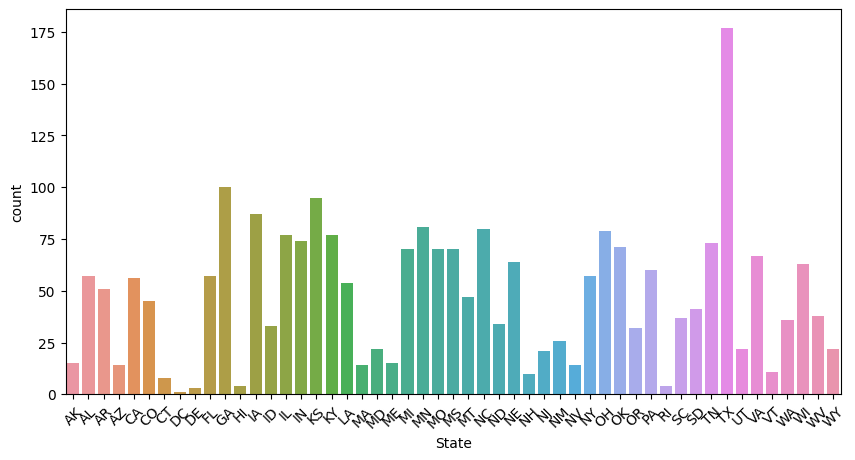

In [284]:
plt.figure(figsize=(10, 5))
chart = sns.countplot( data=covid, x='State')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

### All Bed Occupancy 5 Number Summary Box Plot 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


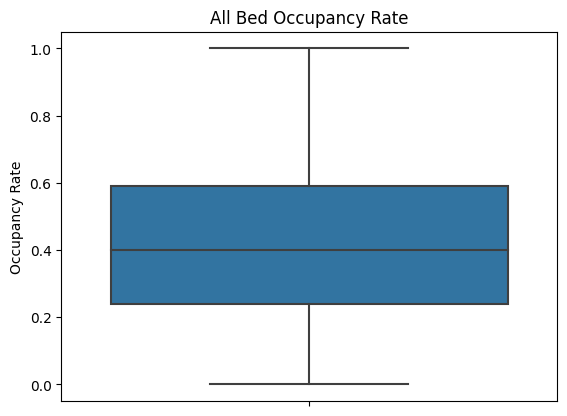

In [285]:
sns.boxplot(y='All Bed Occupancy Rate', data=covid)

plt.title('All Bed Occupancy Rate')
plt.ylabel('Occupancy Rate')
plt.show()

#### Convert Target Var Using High Occupancy Threshold

In [286]:
covid['All Bed Occupancy Rate'] = covid['All Bed Occupancy Rate'].apply(
    lambda x: 'high occupancy' if x > 0.60
    else ('middle occupancy' if x > 0.25
          else 'low occupancy')
)

covid['All Bed Occupancy Rate'].astype('object')

1         high occupancy
2       middle occupancy
3          low occupancy
4       middle occupancy
5       middle occupancy
              ...       
2532       low occupancy
2533    middle occupancy
2534    middle occupancy
2535    middle occupancy
2536    middle occupancy
Name: All Bed Occupancy Rate, Length: 2436, dtype: object

In [287]:
covid['All Bed Occupancy Rate'].value_counts()

All Bed Occupancy Rate
middle occupancy    1231
low occupancy        656
high occupancy       549
Name: count, dtype: int64

### Value Counts of Categorized All Bed Occupancy Rate

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


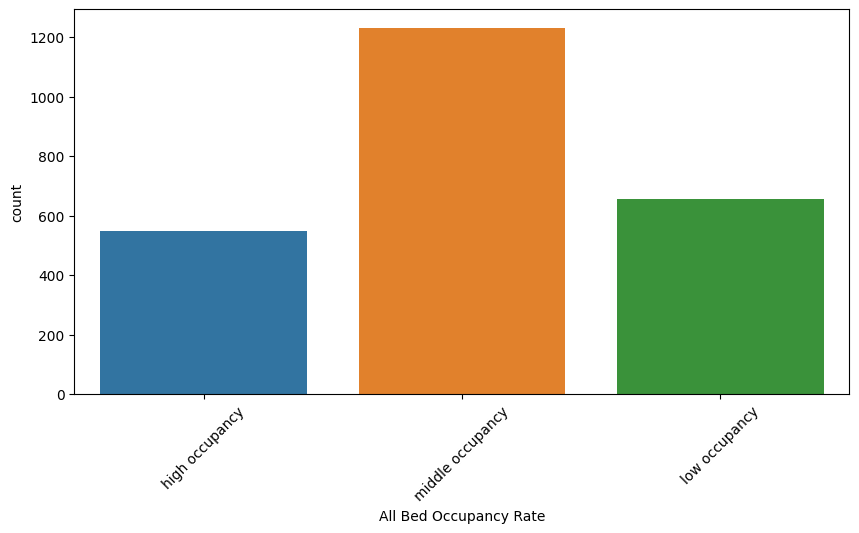

In [288]:
plt.figure(figsize=(10, 5))
chart = sns.countplot(data=covid, x='All Bed Occupancy Rate')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [289]:
covid.describe()

,fips_code,Staffed All Beds,Licensed All Beds,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)]
count,2436.000000,2436.000000,2436.000000,2.436000e+03,2.436000e+03,2.436000e+03,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,30149.147373,332.106322,428.863711,1.296366e+05,9.711367e+04,2.064483e+04,2.665162,3.547758,14.597846,3.453977,4.594261,18.994130
std,14947.143726,1003.550685,1279.834426,3.747552e+05,2.809996e+05,5.350184e+04,2.417202,3.175213,12.894066,3.906481,5.076848,20.905135
min,1001.000000,2.000000,0.000000,1.087000e+03,8.800000e+02,2.540000e+02,0.092000,0.128000,0.493000,0.000000,0.000000,0.000000
25%,19032.000000,25.000000,25.000000,1.550450e+04,1.171075e+04,3.064000e+03,1.291000,1.710500,6.940500,1.588000,2.113750,8.511000
50%,29114.000000,50.000000,76.000000,3.563350e+04,2.688050e+04,6.643500e+03,2.038500,2.720500,11.203000,2.626500,3.506000,14.336000
75%,42089.500000,209.000000,272.250000,9.681875e+04,7.229200e+04,1.637425e+04,3.138000,4.210000,17.792750,4.081500,5.441500,22.717250
max,56045.000000,23071.000000,27400.000000,1.010552e+07,7.658126e+06,1.375957e+06,30.373000,39.077000,155.666000,97.226000,120.423000,463.326000


#### **Normalizing Numeric Vectors**

In [290]:
numeric = covid.select_dtypes(include=['float64']).columns.tolist()
covid[numeric] = MinMaxScaler().fit_transform(covid[numeric])

#### **One-Hot Encoding and Partition Data**

In [291]:
# Drop Target Before One-Hot Encoding 
non_numeric = covid.select_dtypes(include=['object']).columns.tolist()
covid_1h = pd.get_dummies(covid, columns = non_numeric)

covid_1h.head()

,fips_code,Staffed All Beds,Licensed All Beds,Population,Population (20+),Population (65+),Staffed All Beds [Per 1000 People],Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],...,County Name_Yellowstone,County Name_Yoakum,County Name_Yolo,County Name_York,County Name_Young,County Name_Yuba,County Name_Yuma,All Bed Occupancy Rate_high occupancy,All Bed Occupancy Rate_low occupancy,All Bed Occupancy Rate_middle occupancy
1,2020,0.042351,0.041934,0.028745,0.027768,0.023318,0.107856,0.114432,0.191953,0.040534,...,False,False,False,False,False,False,False,True,False,False
2,2050,0.001387,0.001350,0.001695,0.001332,0.000834,0.058585,0.075483,0.153107,0.020889,...,False,False,False,False,False,False,False,False,False,True
3,2070,0.000694,0.000657,0.000387,0.000313,0.000157,0.115848,0.137693,0.243631,0.037027,...,False,False,False,False,False,False,False,False,True,False
4,2090,0.006199,0.006387,0.009687,0.009354,0.007233,0.045342,0.048063,0.088398,0.018184,...,False,False,False,False,False,False,False,False,False,True
5,2110,0.001864,0.002664,0.003071,0.003088,0.002940,0.043228,0.043827,0.064296,0.023379,...,False,False,False,False,False,False,False,False,False,True


### Check Prevelance 

From the prevelance, we understand that at random there is a 21.9% chance of selecting a county with high occupancy rate. 

In [292]:
print(covid_1h['All Bed Occupancy Rate_high occupancy'].value_counts(normalize=True))
print(covid_1h['All Bed Occupancy Rate_middle occupancy'].value_counts(normalize=True))
print(covid_1h['All Bed Occupancy Rate_low occupancy'].value_counts(normalize=True))

All Bed Occupancy Rate_high occupancy
False    0.774631
True     0.225369
Name: proportion, dtype: float64
All Bed Occupancy Rate_middle occupancy
True     0.505337
False    0.494663
Name: proportion, dtype: float64
All Bed Occupancy Rate_low occupancy
False    0.730706
True     0.269294
Name: proportion, dtype: float64


### Partition using train_test_split

In [293]:
X = covid_1h.drop(['All Bed Occupancy Rate_high occupancy'], axis=1).values
y = covid_1h['All Bed Occupancy Rate_high occupancy'].values 

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=21)

### Create Tuning Set

In [295]:
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)

#### **Building the Model**

In [296]:
import random
random.seed(1984)

covid_KNN = KNeighborsClassifier(n_neighbors=9)
covid_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### Evaluation Metrics

In [297]:
covid_prob1 = covid_KNN.predict_proba(X_tune)
print(covid_prob1[:5]) 

[[0.77777778 0.22222222]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.66666667 0.33333333]]


In [298]:
covid_pred1 = covid_KNN.predict(X_tune)
print(covid_pred1)

[False False False False False False False False False False  True False
  True False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
  True False False  True False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True False False False  True False
 False  True False False False False False False False False False False
 False False False False False False False False Fa

In [299]:
final_model= pd.DataFrame({'neg_prob':covid_prob1[:, 0], 'pred':covid_pred1,'target':y_tune, 'pos_prob':covid_prob1[:, 1]})
print(final_model.head())

   neg_prob   pred  target  pos_prob
0  0.777778  False   False  0.222222
1  0.888889  False    True  0.111111
2  0.888889  False   False  0.111111
3  0.888889  False   False  0.111111
4  0.666667  False   False  0.333333


### Check Model's Accuracy on Test Data

In [300]:
print(covid_KNN.score(X_test, y_test))

0.7827868852459017


### Check Model's Accuracy on Validation Data

In [301]:
print(covid_KNN.score(X_tune, y_tune))

0.7991803278688525


### Confusion Matrix

[[181   8]
 [ 41  14]]


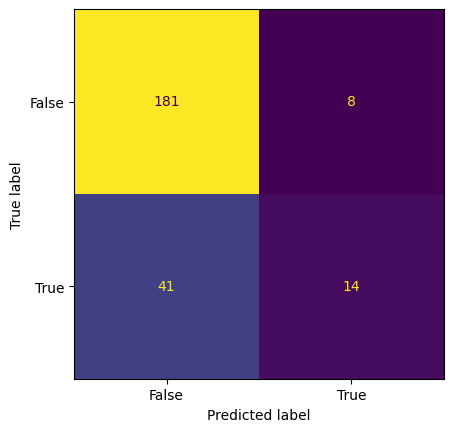

In [302]:
print(metrics.confusion_matrix(final_model.target,final_model.pred)) 
print(metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True], colorbar=False))

In [303]:
print(final_model.target.value_counts())

target
False    189
True      55
Name: count, dtype: int64


### AUC and ROC Curve 

Text(0.5, 0, 'False Positive Rate')

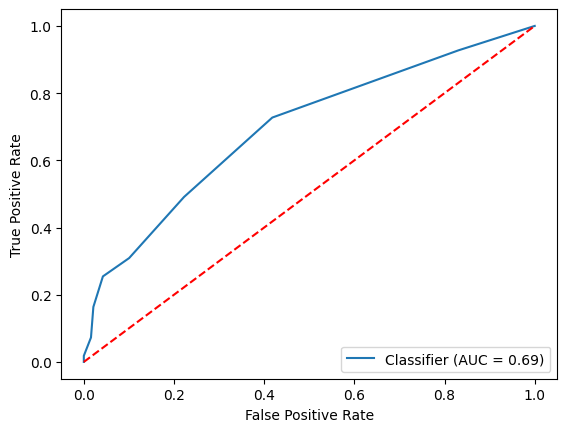

In [304]:
print(metrics.RocCurveDisplay.from_predictions(final_model.target, final_model.pos_prob))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### AUC Value

In [305]:
print(metrics.roc_auc_score(final_model.target, final_model.pos_prob))

0.6946608946608948


### Choose K

In [306]:
def chooseK(k, x_train, y_train, x_test, y_test): # 5 parameters - y is target, x is features, need k size
    random.seed(1)
    print("calculating... ", k, "k")
    class_knn = KNeighborsClassifier(n_neighbors = k) # actual model / target
    class_knn.fit(x_train, y_train) # train and score
    
    # calculate accuracy
    accu = class_knn.score(x_test, y_test)
    return accu

In [307]:
test = pd.DataFrame({'k':list(range(1,18,2)), 
                     'accu':[chooseK(i, X_train, y_train, X_test, y_test) for i in list(range(1, 18, 2))]})


calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k


In [308]:
test2 = test.sort_values(by=['accu'], ascending=False)
print(test2.head())

    k      accu
7  15  0.786885
4   9  0.782787
3   7  0.778689
5  11  0.778689
6  13  0.778689


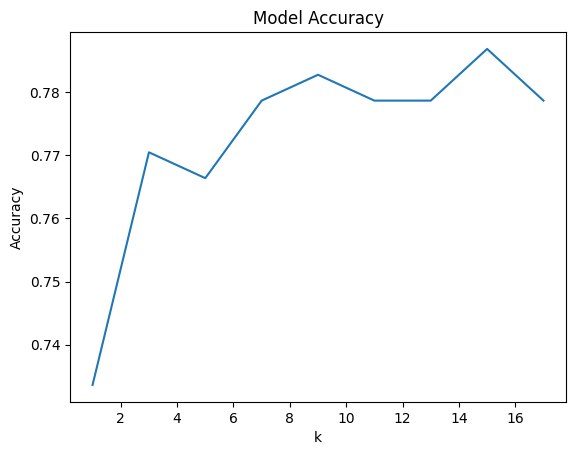

In [309]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [310]:
test_probs = covid_KNN.predict_proba(X_test)
test_preds = covid_KNN.predict(X_test)

In [311]:
test_probabilities = pd.DataFrame(test_probs, columns = ['not_high_occupancy_prob', 'high_occupancy_prob'])
test_probabilities.head()

,not_high_occupancy_prob,high_occupancy_prob
0,1.000000,0.000000
1,0.777778,0.222222
2,0.888889,0.111111
3,0.555556,0.444444
4,0.888889,0.111111


In [312]:
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': test_probabilities['high_occupancy_prob']})
final_model.head()

,actual_class,pred_class,pred_prob
0,False,False,0.000000
1,False,False,0.222222
2,False,False,0.111111
3,False,False,0.444444
4,False,False,0.111111


In [313]:
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


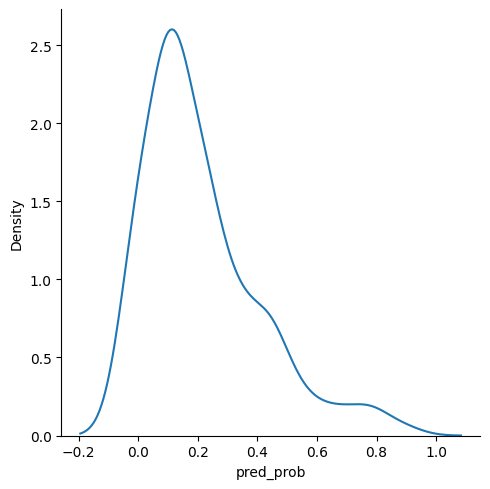

In [314]:
sns.displot(final_model, x="pred_prob", kind="kde")

In [315]:
print(final_model.pred_prob.value_counts())

pred_prob
0.111111    81
0.222222    49
0.000000    47
0.333333    24
0.444444    23
0.555556     7
0.777778     6
0.666667     5
0.888889     2
Name: count, dtype: int64


### Adjusting Threshold

In [316]:
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = metrics.confusion_matrix(z, thres)  
    print(con_mat)

## Original Model 

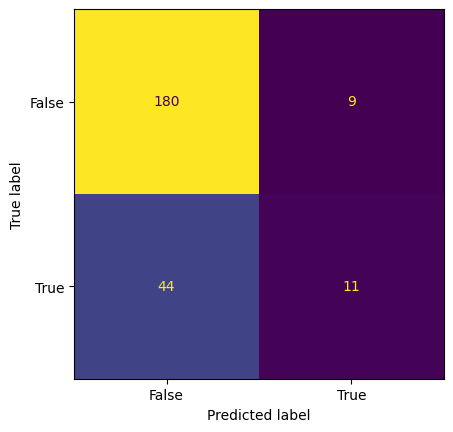

In [317]:

confusion_matrix(final_model.actual_class, final_model.pred_class)   # original model
print(metrics.ConfusionMatrixDisplay.from_predictions(final_model.actual_class,final_model.pred_class, display_labels = [False, True], colorbar=False))


### Adjusting Threshold to 88%

In [318]:
adjust_thres(final_model.pred_prob, .88, final_model.actual_class)

[[187   2]
 [ 55   0]]


### Adjusting Threshold to 77%

In [319]:
adjust_thres(final_model.pred_prob, .77, final_model.actual_class) 

[[185   4]
 [ 51   4]]


### Adjusting Threshold to 66% 

In [320]:
adjust_thres(final_model.pred_prob, .66, final_model.actual_class) 

[[183   6]
 [ 48   7]]
